# The Reynolds Pamphlet

![SegmentLocal](img/4.gif "segment")


![SegmentLocal](img/2.jpg "segment")

In [5]:
import os             
folder = "./data/Reynolds Pamphlet/"
txt_files = os.listdir(folder)   # imagine you're one directory above test dir
print(txt_files)

['reynolds.txt']


In [6]:
import pandas as pd
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

the spirit of jacobinism, if not entirely a new spirit, has at least been cloathed with a more gigantic body and armed with more powerful weapons than it ever before possessed. It is perhaps not too much to say, that it threatens more extensive and complicated mischiefs to the world than have hitherto flowed from the three great scourges of mankind, War, Pestilence and Famine. To what point it will ultimately lead society, it is impossible for human foresight to pronounce; but there is just ground to apprehend that its progress may be marked with calamities of which the dreadful incidents of the French revolution afford a very faint image. Incessantly busied in undermining all the props of public security and private happiness, it seems to threaten the political and moral world with a complete overthrow.

A principal engine, by which this spirit endeavours to accomplish its purposes is that of calumny. It is essential to its success that the influence of men of upright principles, disp

In [7]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/robotmua-640cce327819.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: reynolds
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative




In [9]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in reynolds Letter
['James Reynolds', 'Reynolds', 'citizen', 'wife', 'husband', 'Muhlenberg', 'Secretary', 'Wolcott', 'daughter', 'Clingman', 'Giles', 'J. Monroe', 'man', 'wife', 'wife', 'conspirators', 'man', 'men', 'members', 'opponents', 'man', 'gentlemen', 'character', 'person', 'A. Venable', 'gentleman', 'alexander hamilton', 'whispers', 'patrons', 'man', 'characters', 'character', 'wife', 'character', 'character', 'Treasurer', 'officers', 'officers', 'officers', 'person', 'person', 'husband', 'informers', 'man', 'accusers', 'Duer', 'woman', 'Henry Seckel', 'friends', 'friends', 'crimination', 'men', 'men', 'men', 'member', 'characters', 'character', 'friends', 'citizens', 'citizens', 'millions', 'opponents', 'several', 'gentlemen', 'person', 'persons', 'man', 'either', 'husband', 'man', 'many', 'public', 'gentlemen', 'directors', 'Duer.', 'gentlemen', 'editor', 'majority', 'person', 'secretary', 'character', 'character', 'wife', 'character', 'witness', 'man'

In [10]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [17]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Letters The Reynolds Pamphlet")])
fig.show()

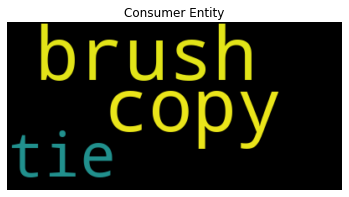

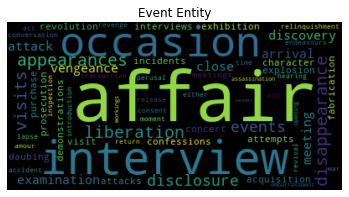

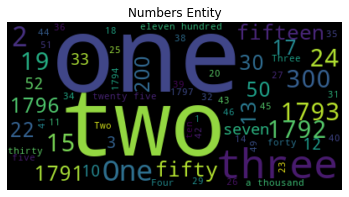

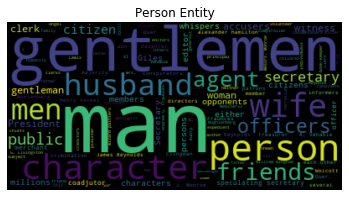

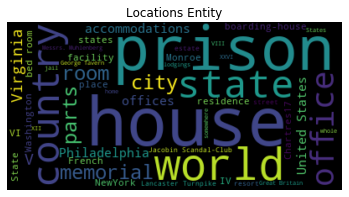

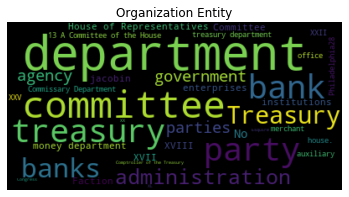

In [12]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()